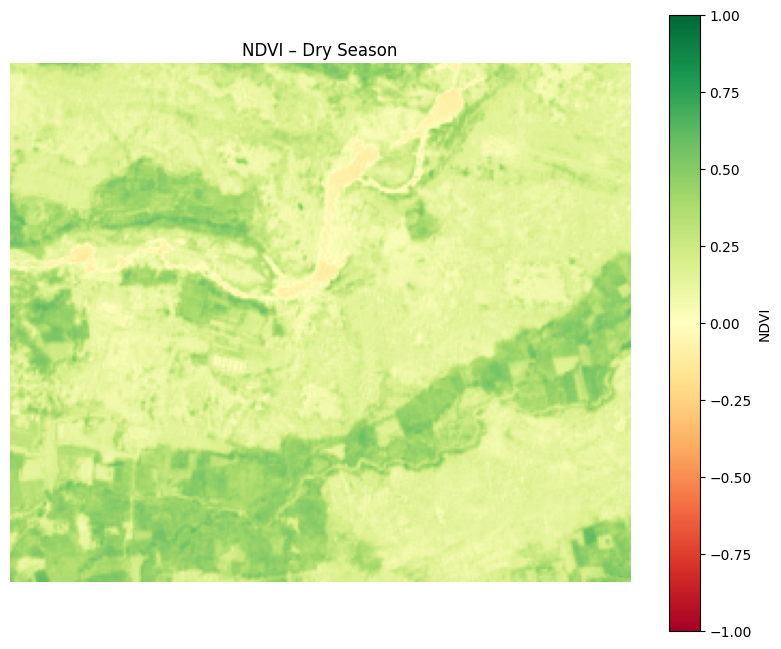

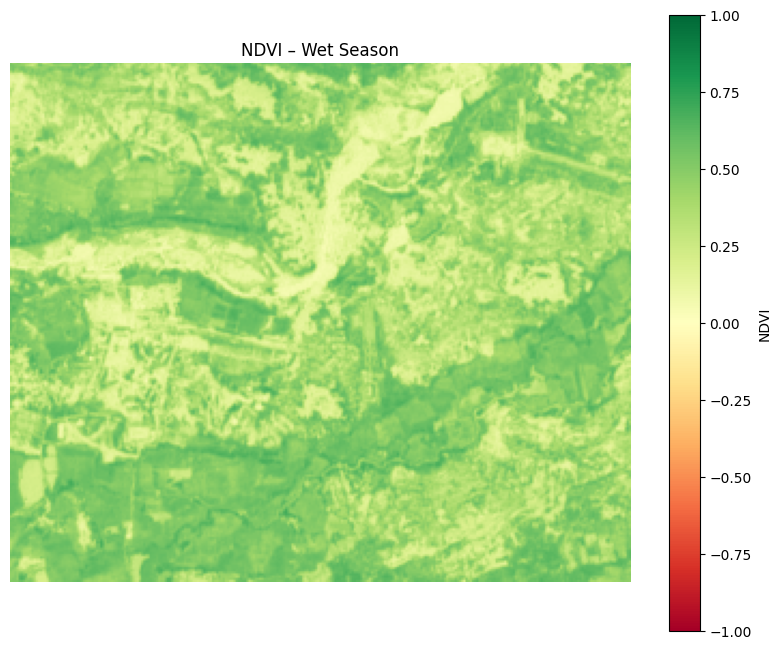

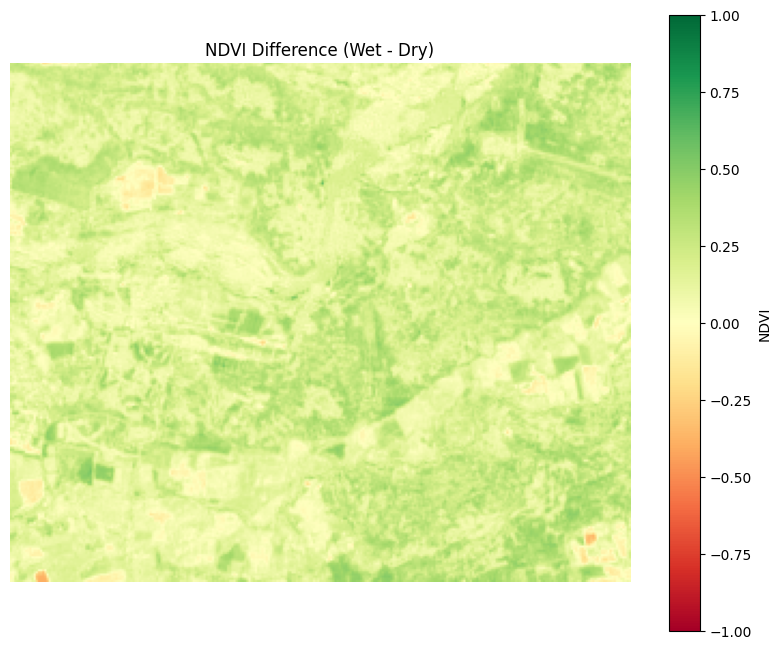

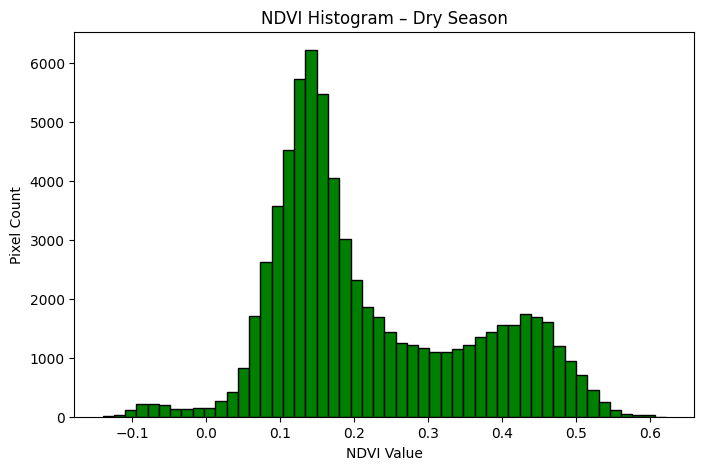

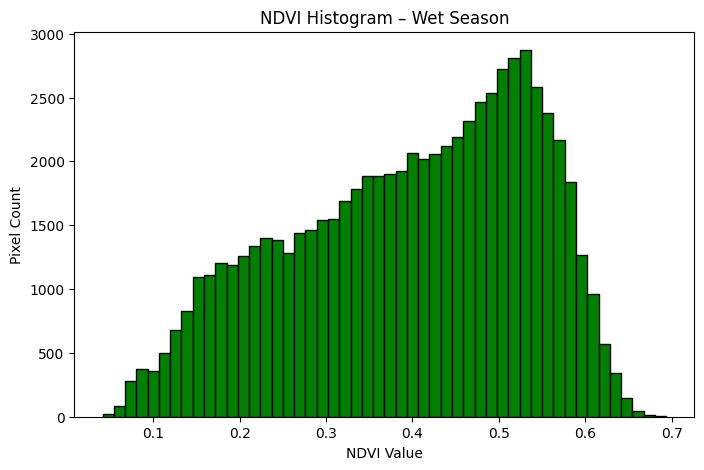

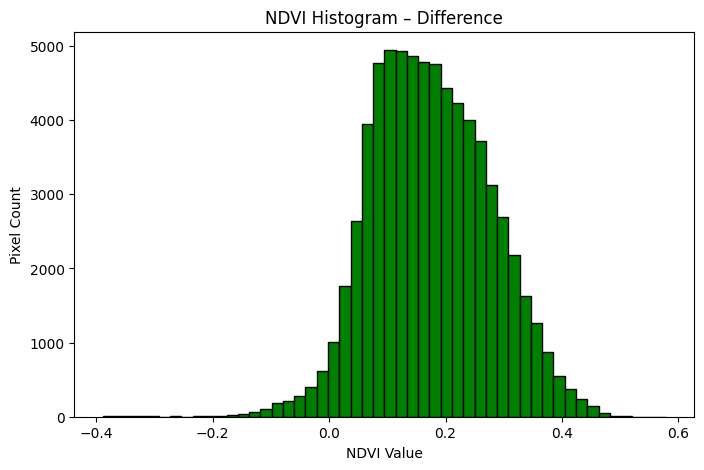

In [3]:
import sys
sys.path.append('../')

import numpy as np
import rasterio
import matplotlib.pyplot as plt
from scripts.paths_to_data_results import get_project_paths

# Load paths
paths = get_project_paths()

def plot_ndvi_map(ndvi_path, output_path, title):
    with rasterio.open(ndvi_path) as src:
        ndvi = src.read(1)
    
    plt.figure(figsize=(10, 8))
    plt.imshow(ndvi, cmap='RdYlGn', vmin=-1, vmax=1)
    plt.colorbar(label='NDVI')
    plt.title(title)
    plt.axis('off')
    plt.savefig(output_path, dpi=300, bbox_inches='tight')
    plt.show()

def plot_ndvi_histogram(ndvi_path, output_path, title):
    with rasterio.open(ndvi_path) as src:
        ndvi = src.read(1)
    ndvi_flat = ndvi.flatten()
    ndvi_flat = ndvi_flat[~np.isnan(ndvi_flat)]

    plt.figure(figsize=(8, 5))
    plt.hist(ndvi_flat, bins=50, color='green', edgecolor='black')
    plt.title(title)
    plt.xlabel('NDVI Value')
    plt.ylabel('Pixel Count')
    plt.savefig(output_path, dpi=300, bbox_inches='tight')
    plt.show()

# Plot all maps and histograms
plot_ndvi_map(paths['ndvi_dry'], paths['plot_dry'], "NDVI – Dry Season")
plot_ndvi_map(paths['ndvi_wet'], paths['plot_wet'], "NDVI – Wet Season")
plot_ndvi_map(paths['ndvi_diff'], paths['plot_diff'], "NDVI Difference (Wet - Dry)")

plot_ndvi_histogram(paths['ndvi_dry'], paths['hist_dry'], "NDVI Histogram – Dry Season")
plot_ndvi_histogram(paths['ndvi_wet'], paths['hist_wet'], "NDVI Histogram – Wet Season")
plot_ndvi_histogram(paths['ndvi_diff'], paths['hist_diff'], "NDVI Histogram – Difference")
